In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
Comments = pd.read_csv("Comments.csv.gz")
Users = pd.read_csv("Users.csv.gz")
Posts = pd.read_csv("Posts.csv.gz")

# Zadanie 1

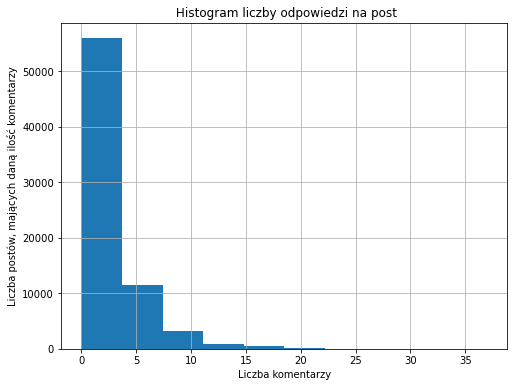

In [45]:
Posts.hist('CommentCount',figsize = (8,6))
plt.xlabel('Liczba komentarzy')
plt.ylabel('Liczba postów, mających daną ilość komentarzy')
plt.title(' Histogram liczby odpowiedzi na post')
plt.show()

# Zadanie 2

In [39]:
Owner_Id_with_most_viewed_posts = Posts.groupby('OwnerUserId')\
.ViewCount.sum()\
.reset_index()\
.sort_values(by = 'ViewCount', ascending = False)\
.reset_index()\
.loc[0,'OwnerUserId']


Users[Users['Id']==Owner_Id_with_most_viewed_posts].reset_index().loc[0,'DisplayName'] 

'Mark Mayo'

# Zadanie 3

In [40]:
Second_accepted_answers = Posts.loc[Posts['Id'].isin(Posts['AcceptedAnswerId']),['Id','OwnerUserId']]\
    .groupby('OwnerUserId').count()\
    .sort_values(by="Id", ascending = False)\
    .reset_index().loc[1,'OwnerUserId']

Users[Users['Id'] == Second_accepted_answers].reset_index().loc[0,'DisplayName']

'jpatokal'

# Zadanie 4

In [41]:
AcceptedAnswers_score = Posts.loc[Posts['Id'].isin(Posts['AcceptedAnswerId']),['Id','ParentId','Score']]\
    .reset_index()\
    .drop(['Id','index'],axis = 1)

OtherAnswersMaxScore = Posts.loc[~Posts['Id'].isin(Posts['AcceptedAnswerId']),['Id','Score','ParentId']]\
    .groupby('ParentId').max('Score')\
    .reset_index().drop(['Id'], axis = 1)\
    .rename(columns={'Score': 'MaxScore'})


Scores = AcceptedAnswers_score.merge(OtherAnswersMaxScore, on = 'ParentId')

k = 0 # Liczba postów, dla których zaakceptowana odpowiedź ma niższy wynik niż odpowiedź o najwyższym wyniku.

for i in range (0,len(Scores)):
    if Scores.loc[i,'Score'] < Scores.loc[i,'MaxScore']:
        k+=1
    else:
        continue

k/len(AcceptedAnswers_score) # Liczymy odsetek postów, dla których zaakceptowana odpowiedź ma 
# niższy wynik niż odpowiedź o najwyższym wyniku, dzieląc k przez ilość postów, dla których istnieje AcceptedAnswer.
            
    





0.09044220055710306